In [1]:
import numpy as np
import os
import cv2 as cv

from constants import *
from hsv_sliders import *
from image_processing import *


In [2]:
files = os.listdir(INPUT_DIR)

solutions = sorted([file for file in files if os.path.splitext(file)[1] == ".txt"])
photos = sorted([file for file in files if os.path.splitext(file)[1] == ".jpg"])

print(photos)


['1_01.jpg', '1_02.jpg', '1_03.jpg', '1_04.jpg', '1_05.jpg', '1_06.jpg', '1_07.jpg', '1_08.jpg', '1_09.jpg', '1_10.jpg', '1_11.jpg', '1_12.jpg', '1_13.jpg', '1_14.jpg', '1_15.jpg', '1_16.jpg', '1_17.jpg', '1_18.jpg', '1_19.jpg', '1_20.jpg', '1_21.jpg', '1_22.jpg', '1_23.jpg', '1_24.jpg', '1_25.jpg', '1_26.jpg', '1_27.jpg', '1_28.jpg', '1_29.jpg', '1_30.jpg', '1_31.jpg', '1_32.jpg', '1_33.jpg', '1_34.jpg', '1_35.jpg', '1_36.jpg', '1_37.jpg', '1_38.jpg', '1_39.jpg', '1_40.jpg', '1_41.jpg', '1_42.jpg', '1_43.jpg', '1_44.jpg', '1_45.jpg', '1_46.jpg', '1_47.jpg', '1_48.jpg', '1_49.jpg', '1_50.jpg', '2_01.jpg', '2_02.jpg', '2_03.jpg', '2_04.jpg', '2_05.jpg', '2_06.jpg', '2_07.jpg', '2_08.jpg', '2_09.jpg', '2_10.jpg', '2_11.jpg', '2_12.jpg', '2_13.jpg', '2_14.jpg', '2_15.jpg', '2_16.jpg', '2_17.jpg', '2_18.jpg', '2_19.jpg', '2_20.jpg', '2_21.jpg', '2_22.jpg', '2_23.jpg', '2_24.jpg', '2_25.jpg', '2_26.jpg', '2_27.jpg', '2_28.jpg', '2_29.jpg', '2_30.jpg', '2_31.jpg', '2_32.jpg', '2_33.jpg', '2_

In [3]:
def show_img(p_img):
    plt.figure(dpi = 200)
    plt.imshow(cv.cvtColor(p_img, cv.COLOR_BGR2RGB))
    plt.show()

templates = load_templates()

def show_squares(p_board):
    for i in range(TOTAL_SQUARES):

        plt.figure(dpi = 200)
        for j in range(TOTAL_SQUARES):
            sq = get_square(p_board, j, i)
            mask = process_square(sq)
            match = get_similitude(mask, templates)
            if match == -1:
                print("-", end = ", ")
            else:
                print(match, end = ", ")

            plt.subplot(1, TOTAL_SQUARES, j + 1)
            plt.imshow(mask)
            plt.axis("off")
        print()
        plt.show()

In [4]:
# hsv_sliders(photos[0], 0.19, 0.19)


In [5]:

tpl = cv.imread(TEMPLATE_PATH)


board = get_trimmed(tpl)
board = process_board(board)

# show_squares(board)


-, -, -, -, -, -, -, 18, -, 5, -, -, -, -, 


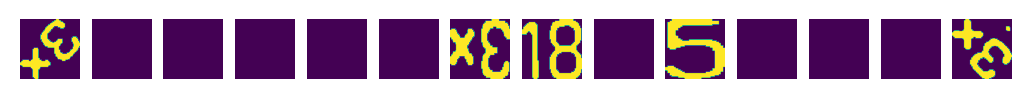

-, -, -, -, -, -, -, 10, -, 2, -, -, -, -, 


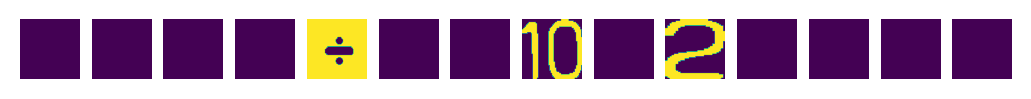

-, -, -, -, -, -, -, 8, -, 3, -, -, -, -, 


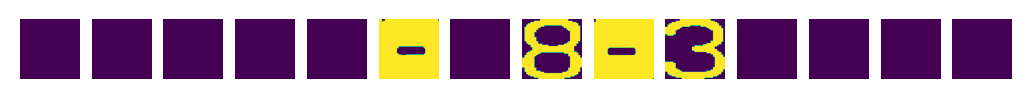

-, -, -, -, -, -, -, 80, -, 6, -, 48, -, -, 


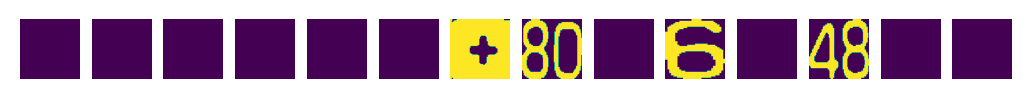

-, -, -, -, -, -, -, 10, -, 9, -, 36, -, -, 


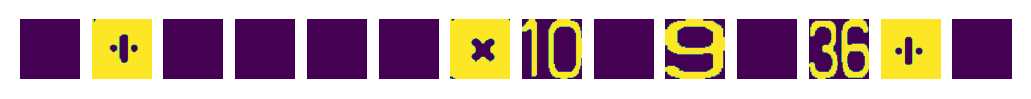

-, -, -, 3, 14, 11, 3, 8, 5, 3, 15, 12, 27, -, 


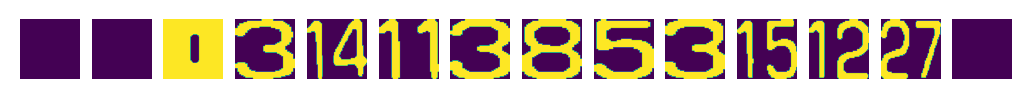

-, -, -, -, -, -, 1, 2, 3, 6, 9, 3, -, -, 


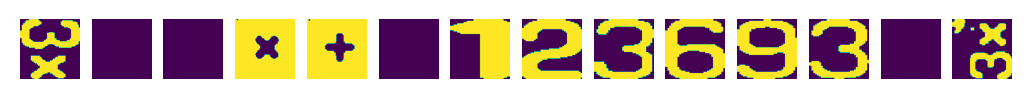

-, -, -, -, -, 7, -, -, 7, 9, 63, -, -, -, 


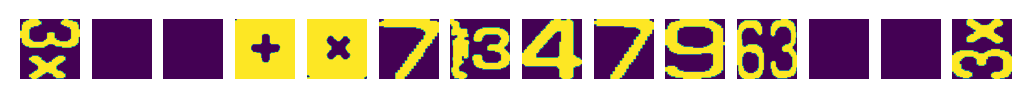

-, -, -, -, 8, 10, 2, 8, 10, -, 54, -, -, -, 


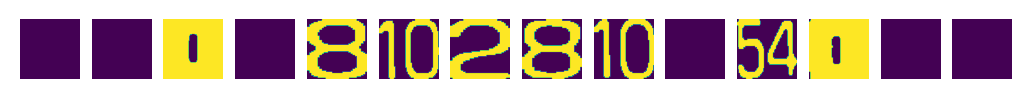

-, -, -, 5, 8, 3, 5, 32, 17, 49, -, -, -, -, 


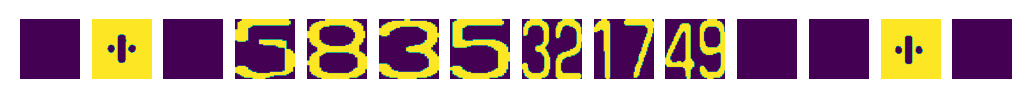

-, -, -, -, 0, -, -, 40, 7, -, -, -, -, -, 


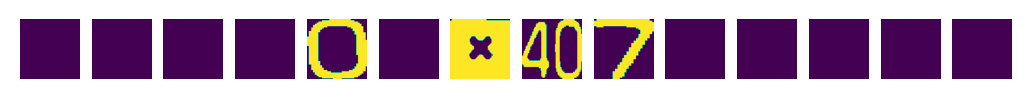

-, -, -, -, -, -, -, 72, 10, -, -, -, -, -, 


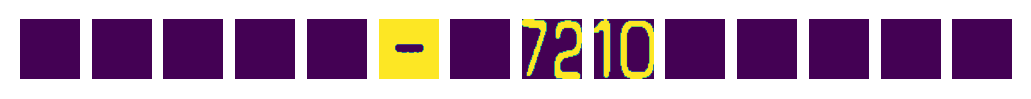

-, -, -, -, -, -, -, -, 70, -, -, -, -, -, 


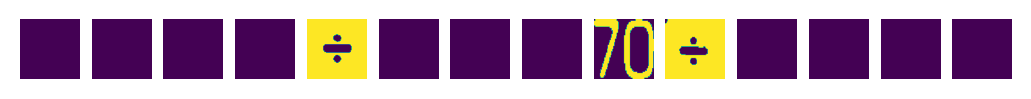

-, -, -, -, -, -, -, -, 60, -, -, -, -, -, 


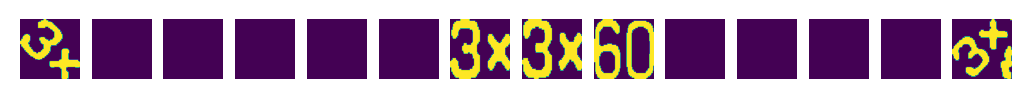

In [9]:
# for photo in photos: 
photo = photos[49]

board = cv.imread(os.path.join(INPUT_DIR, photo))
board = get_trimmed(board)
flt_board = process_board(board)
templates = load_templates()



# templates = load_templates()

show_squares(flt_board)
# show_img(flt_board)

# hsv_sliders(flt_board, RESIZE_SHOW, RESIZE_SHOW)
